##Q13 Solution##
Four files are used for this question.
the file names are as given below:
"C:\Users\Sai\Desktop\Raw data\01_District_wise_crimes_committed_IPC_2001_2012.csv"
"C:\Users\Sai\Desktop\Raw data\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv"
"C:\Users\Sai\Desktop\Raw data\02_District_wise_crimes_committed_against_ST_2001_2012.csv"
"C:\Users\Sai\Desktop\Raw data\03_District_wise_crimes_committed_against_children_2001_2012.csv"

Steps:
1.Importing the Pandas libraries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Steps:
2.Loading the datasets.
3.Storanging them in a dictionary called file_paths. Renaming the files and storing the new names as keys. New names are shorter for easy access in further code.

In [3]:
file_paths = {
    "IPC Crimes":r"C:\Users\Sai\Desktop\Q2\01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "Crimes Against SC":r"C:\Users\Sai\Desktop\Q2\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "Crimes Against Children": r"C:\Users\Sai\Desktop\Q2\03_District_wise_crimes_committed_against_children_2001_2012.csv",
    "Crimes Against ST": r"C:\Users\Sai\Desktop\Q2\02_District_wise_crimes_committed_against_ST_2001_2012.csv"}

Steps:
4.Reading all the four csv files by assigning them a separate variable.

In [4]:
df_ipc = pd.read_csv(file_paths["IPC Crimes"])
df_sc = pd.read_csv(file_paths["Crimes Against SC"])
df_children = pd.read_csv(file_paths["Crimes Against Children"])
df_st = pd.read_csv(file_paths["Crimes Against ST"])

Steps:
5.Standardizing the column names to ensure the same column names are used across all the four files.

In [5]:
df_ipc.rename(columns={"YEAR": "Year"}, inplace=True)
df_sc.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_children.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_st.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)


Steps:
6.Grouping the data in each dataset by year and state and computing sum of all the crimes committed.
7.using .gropuby() for grouping data.
8.Using .sum() for calculating sum.

In [6]:
ipc_statewise = df_ipc.groupby(["STATE/UT", "Year"])["TOTAL IPC CRIMES"].sum().reset_index()
sc_statewise = df_sc.groupby(["STATE/UT", "Year"]).sum().reset_index()
children_statewise = df_children.groupby(["STATE/UT", "Year"]).sum().reset_index()
st_statewise = df_st.groupby(["STATE/UT", "Year"]).sum().reset_index()


Steps:
9.Merging all datsets using the States and year as keys.
10.Uses how="left" to ensure all IPC crimes remain in the dataset, even if no SC/ST/Children crimes were recorded.

In [7]:
crime_trends = ipc_statewise.merge(sc_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(children_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(st_statewise, on=["STATE/UT", "Year"], how="left")


Steps:
11.pct_change() calculates the year-over-year percentage change in Total IPC Crimes for each state.
Multiplies by 100 to convert into percentage format.

In [8]:
crime_trends["Crime Rate Change (%)"] = crime_trends.groupby("STATE/UT")["TOTAL IPC CRIMES"].pct_change() * 100


12.Finding state with highest increase and highest decrease.

In [9]:
crime_rate_summary = crime_trends.groupby("STATE/UT")["Crime Rate Change (%)"].mean().reset_index()
highest_increase_state = crime_rate_summary.loc[crime_rate_summary["Crime Rate Change (%)"].idxmax()]
highest_decrease_state = crime_rate_summary.loc[crime_rate_summary["Crime Rate Change (%)"].idxmin()]



13.Printing state name with their average crime rate range.

In [10]:
print("State with Highest Crime Rate Increase:")
print(highest_increase_state)
print("\nState with Highest Crime Rate Decrease:")
print(highest_decrease_state)


State with Highest Crime Rate Increase:
STATE/UT                 LAKSHADWEEP
Crime Rate Change (%)      21.378159
Name: 18, dtype: object

State with Highest Crime Rate Decrease:
STATE/UT                 NAGALAND
Crime Rate Change (%)   -0.879816
Name: 24, dtype: object


14.PLotting crime rate change for every state.

In [11]:
unique_states = crime_trends["STATE/UT"].unique()

15.Loops through each state and plots the crime rate change over time.
Uses plt.plot() with:
Marker 'o' → Highlights data points.
Line '-' → Connects points smoothly.
Title → Indicates the state and time range

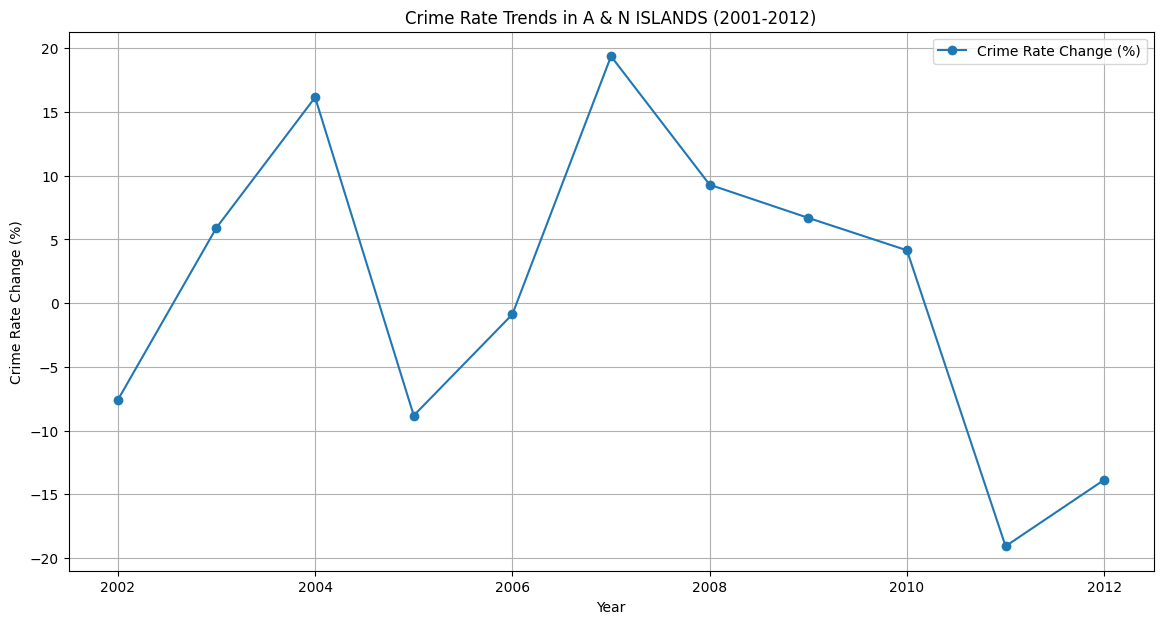

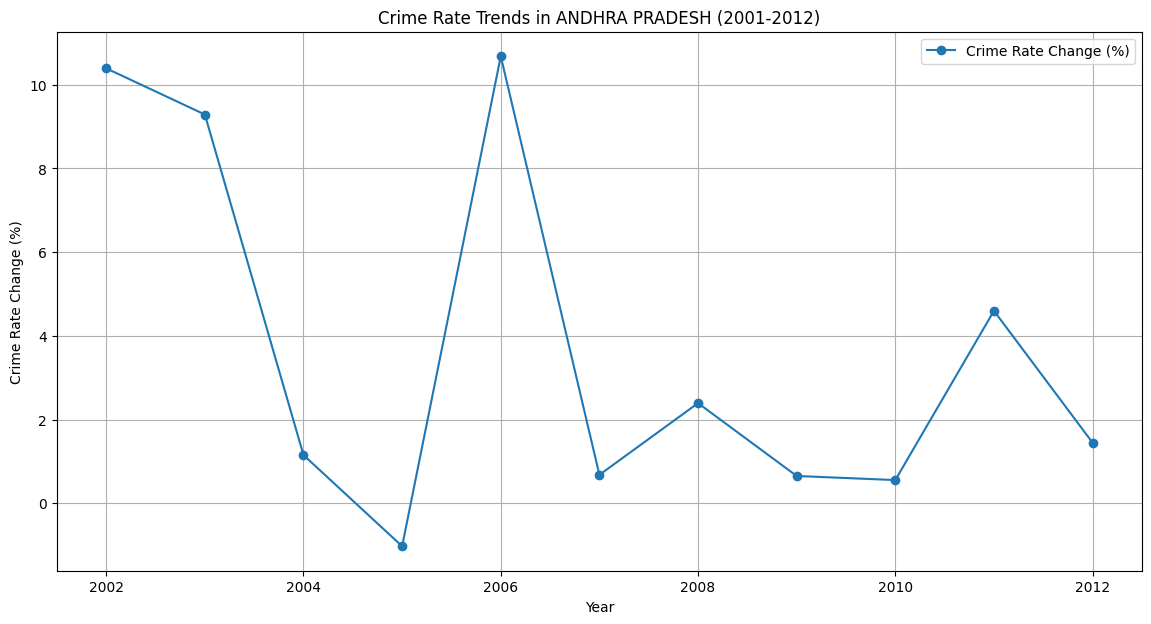

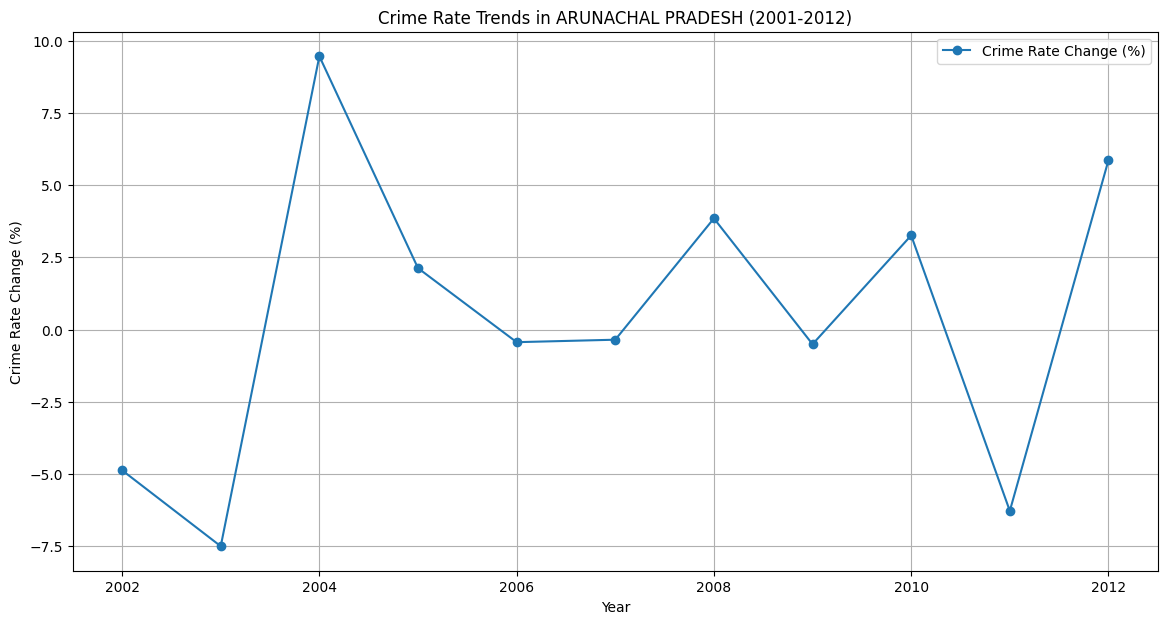

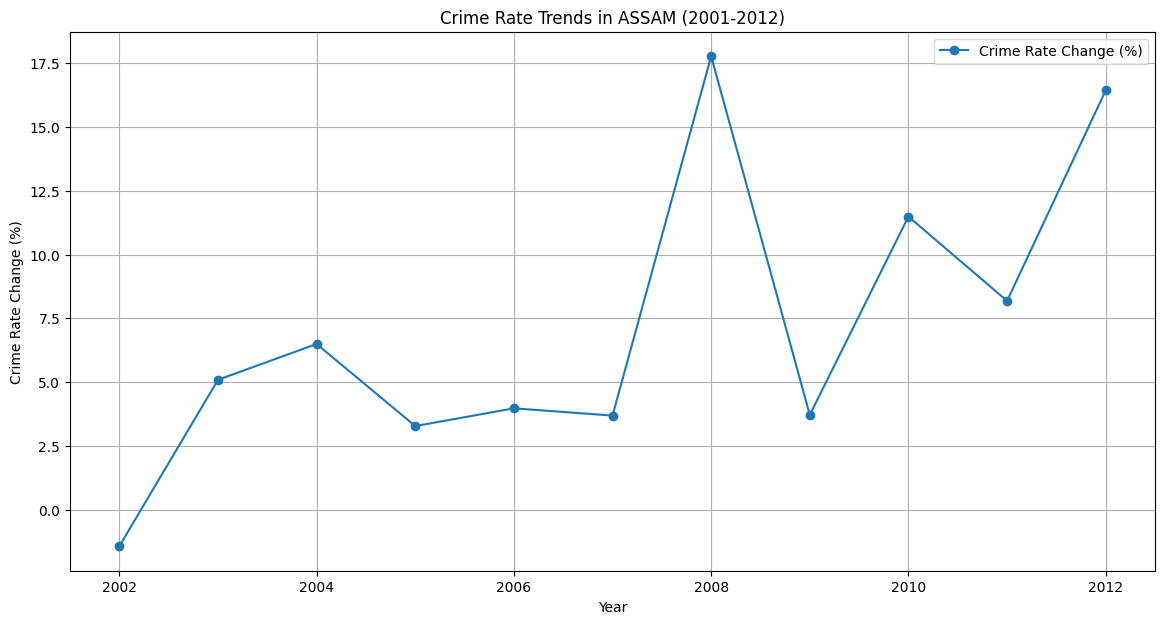

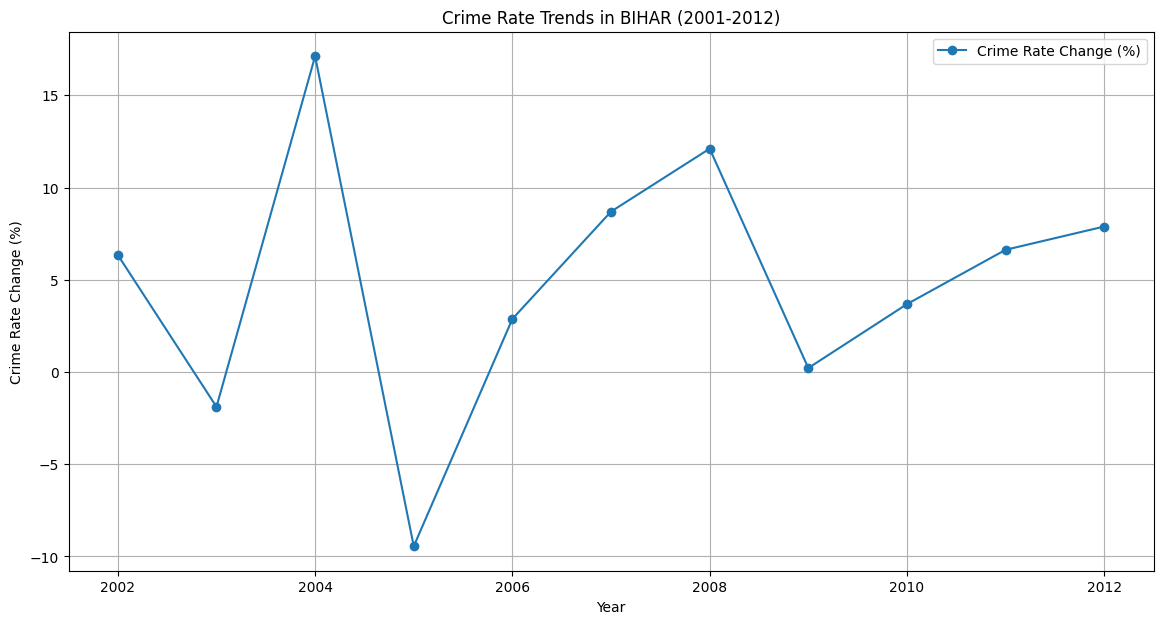

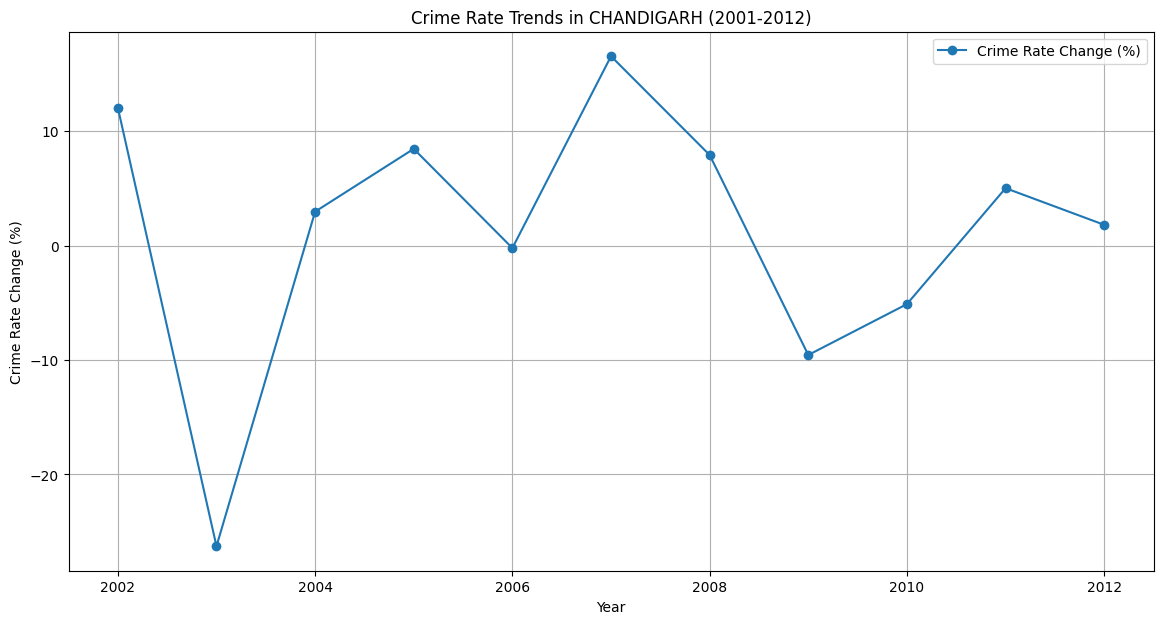

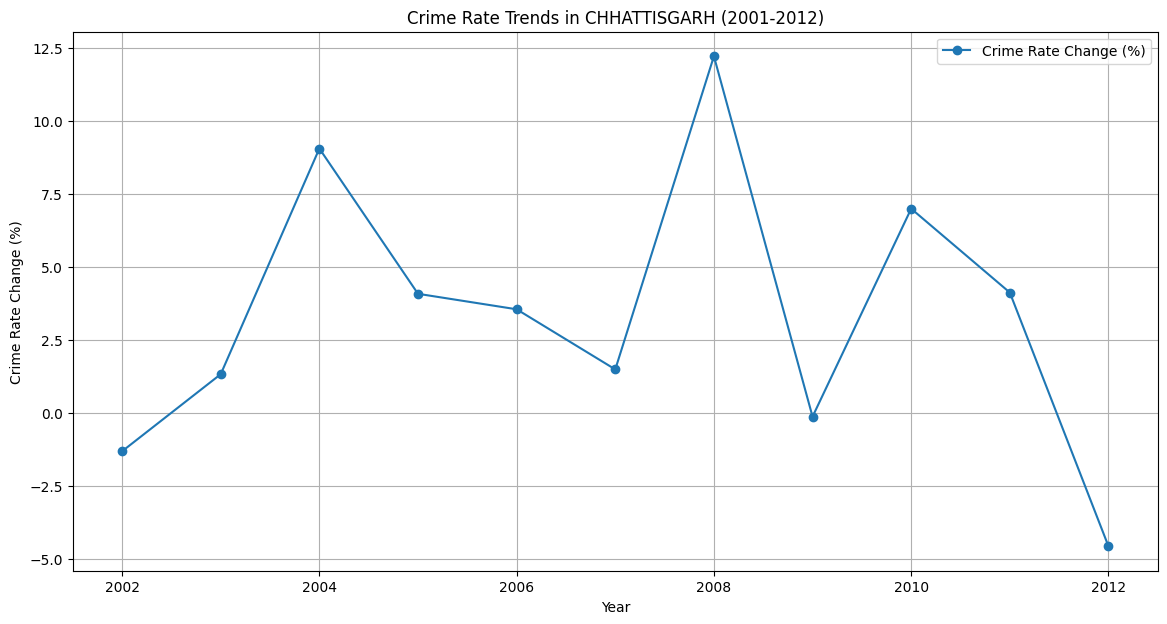

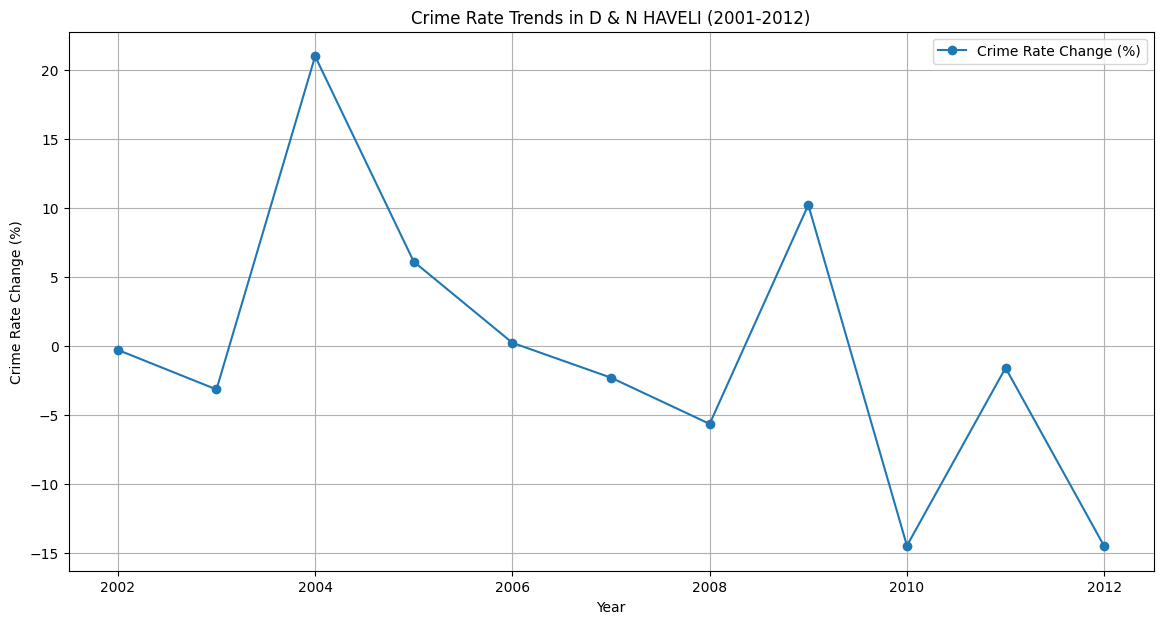

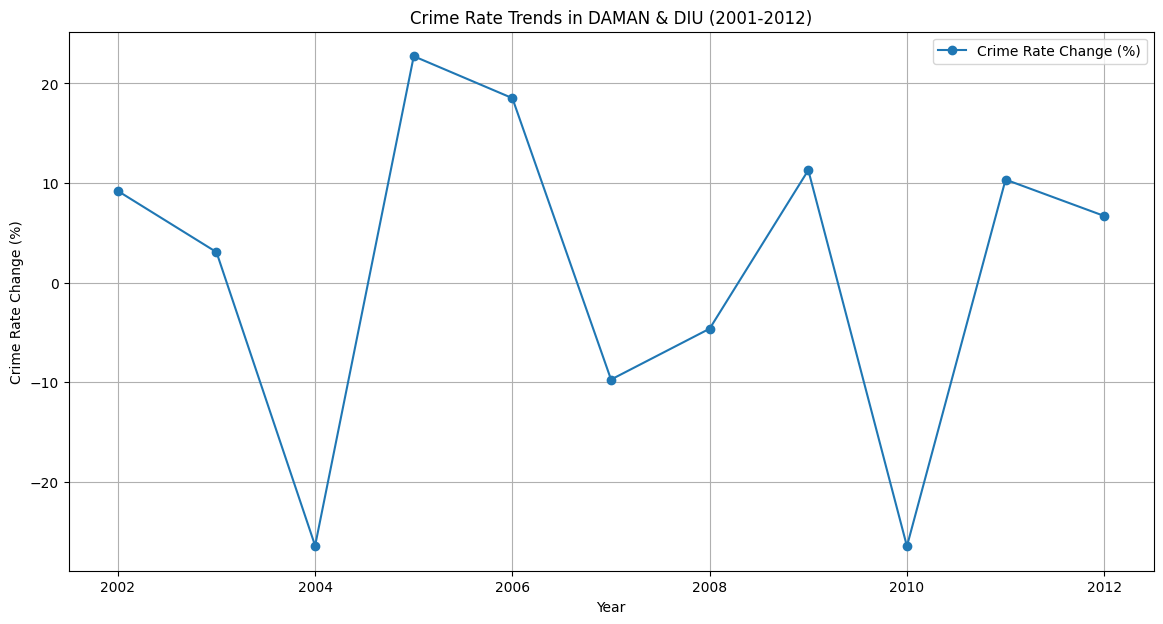

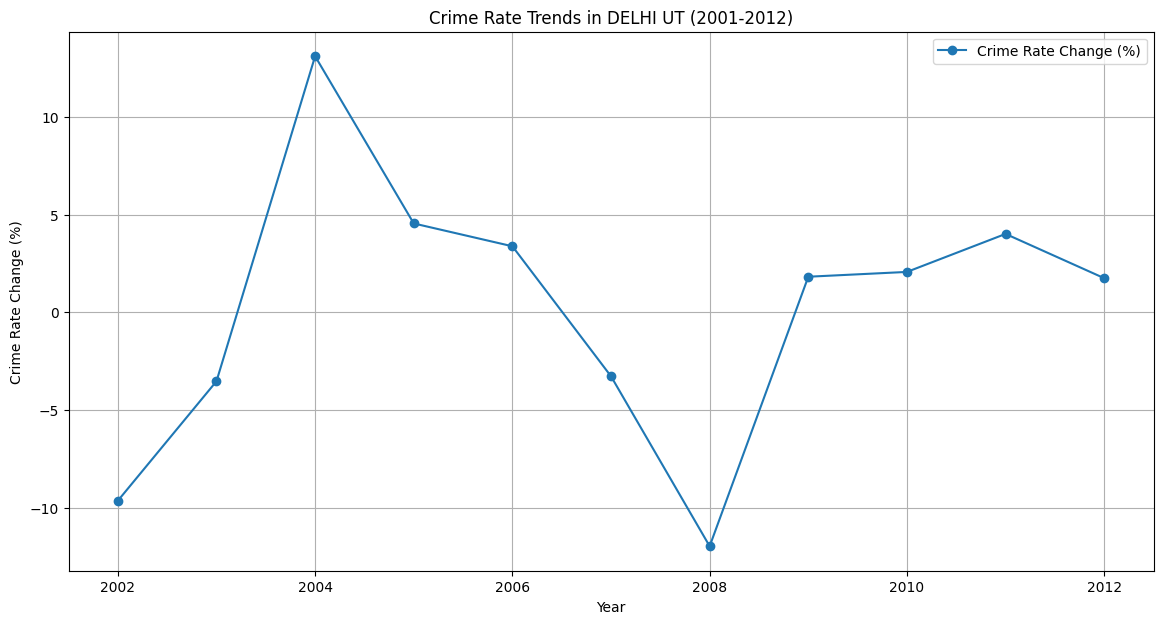

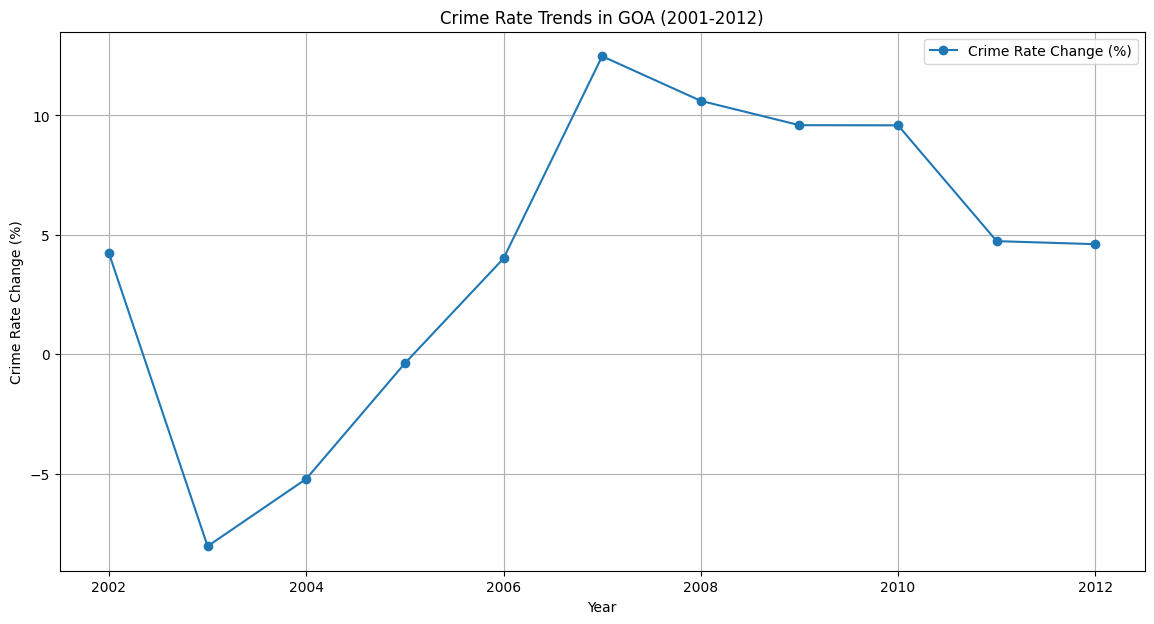

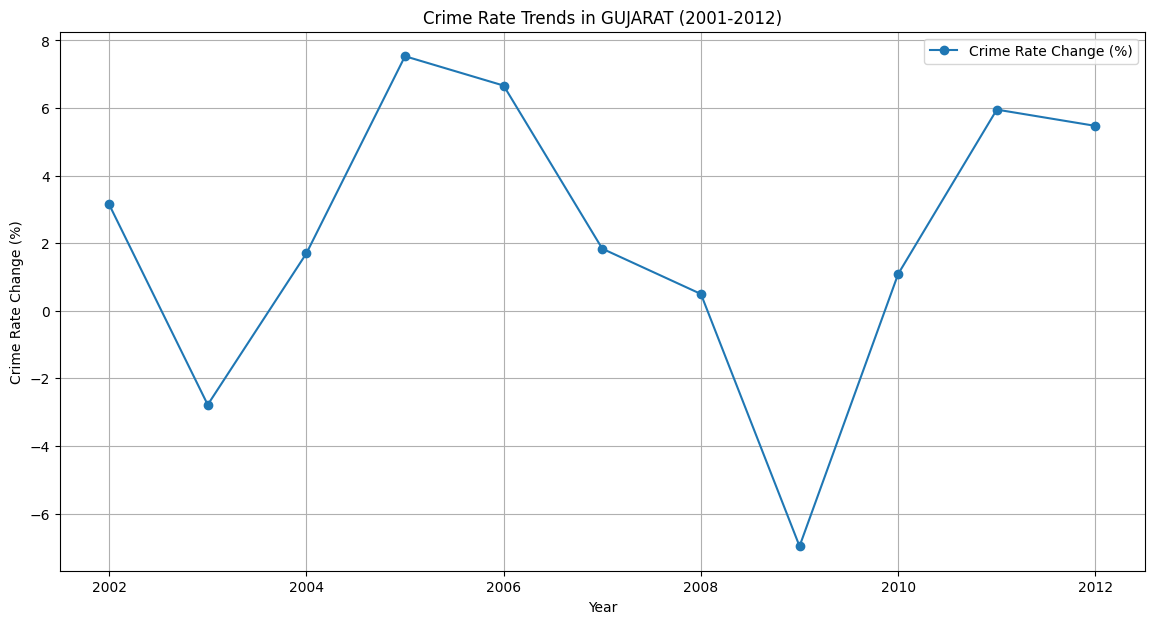

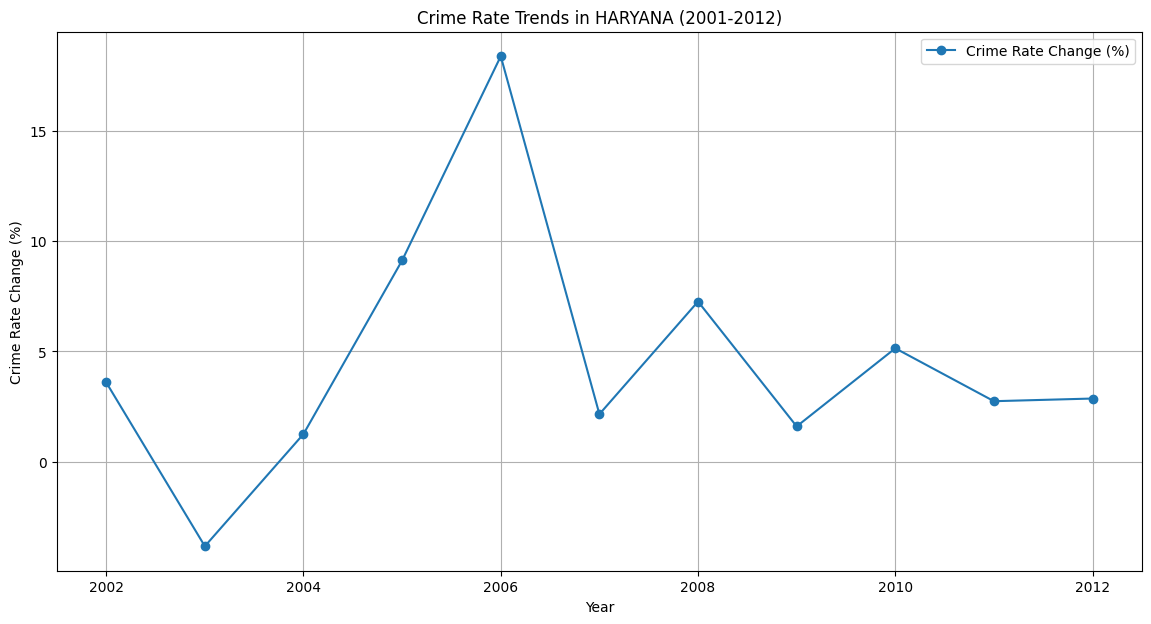

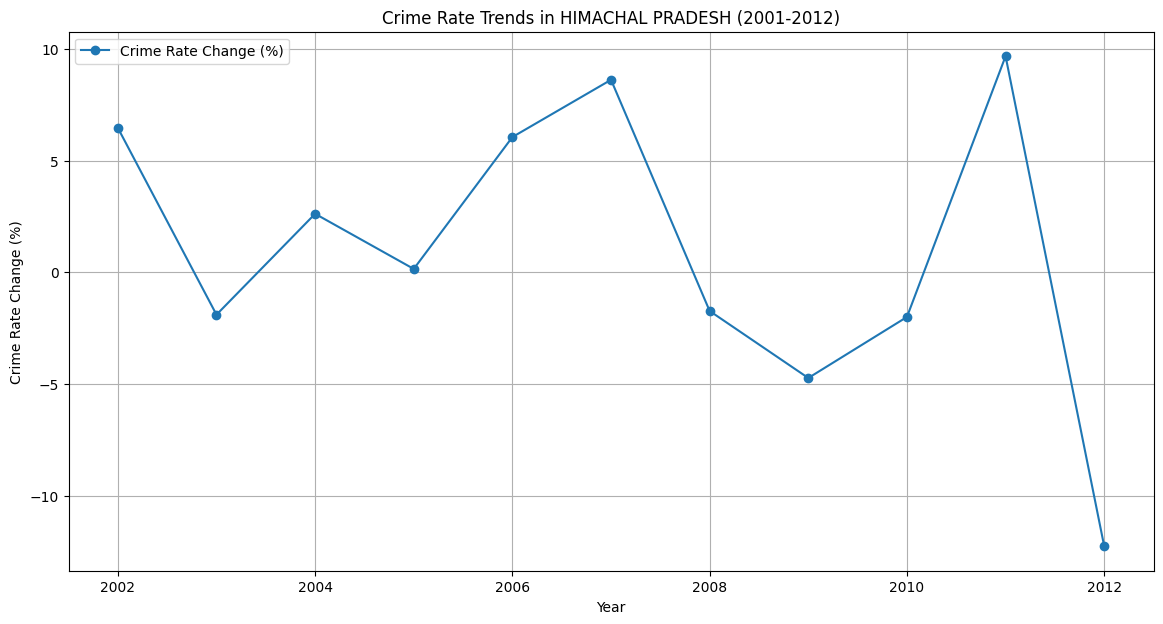

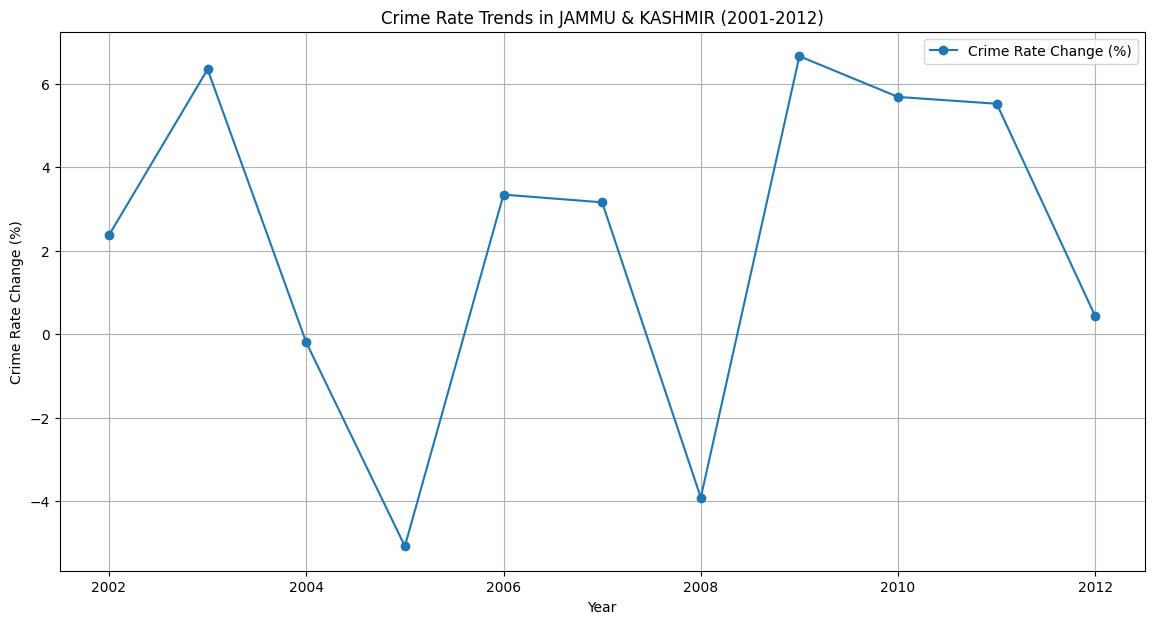

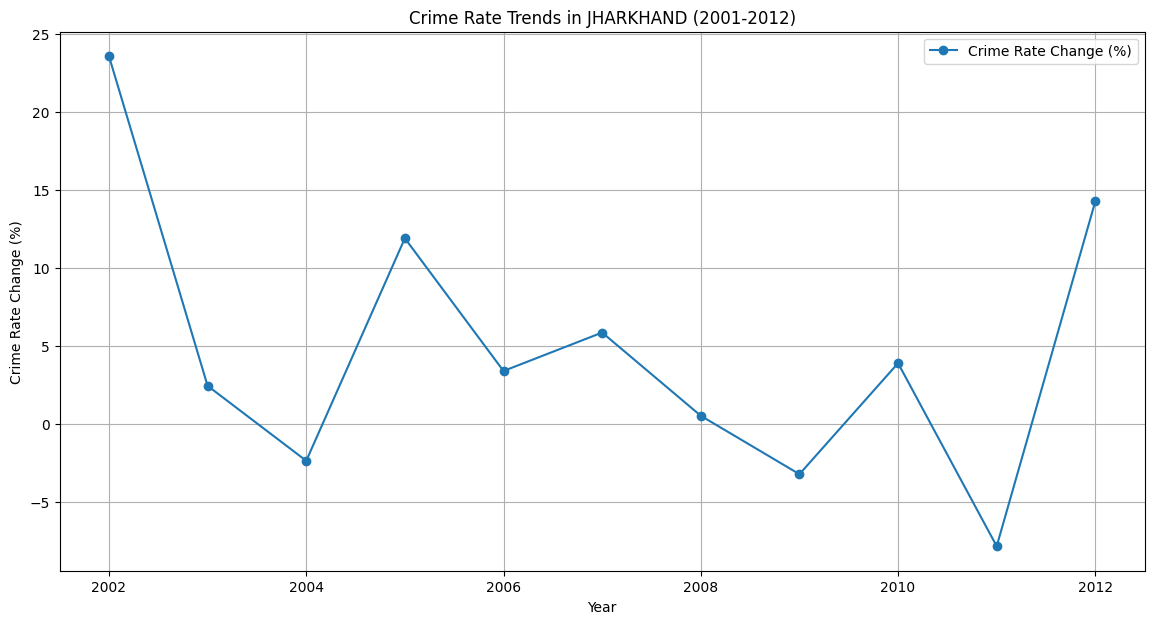

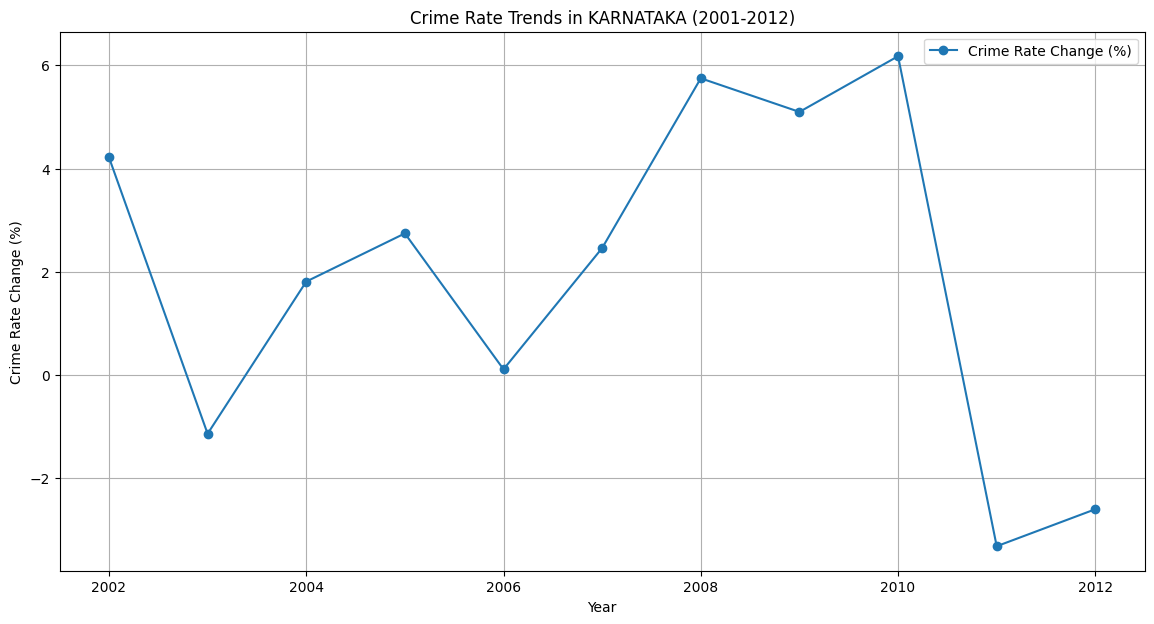

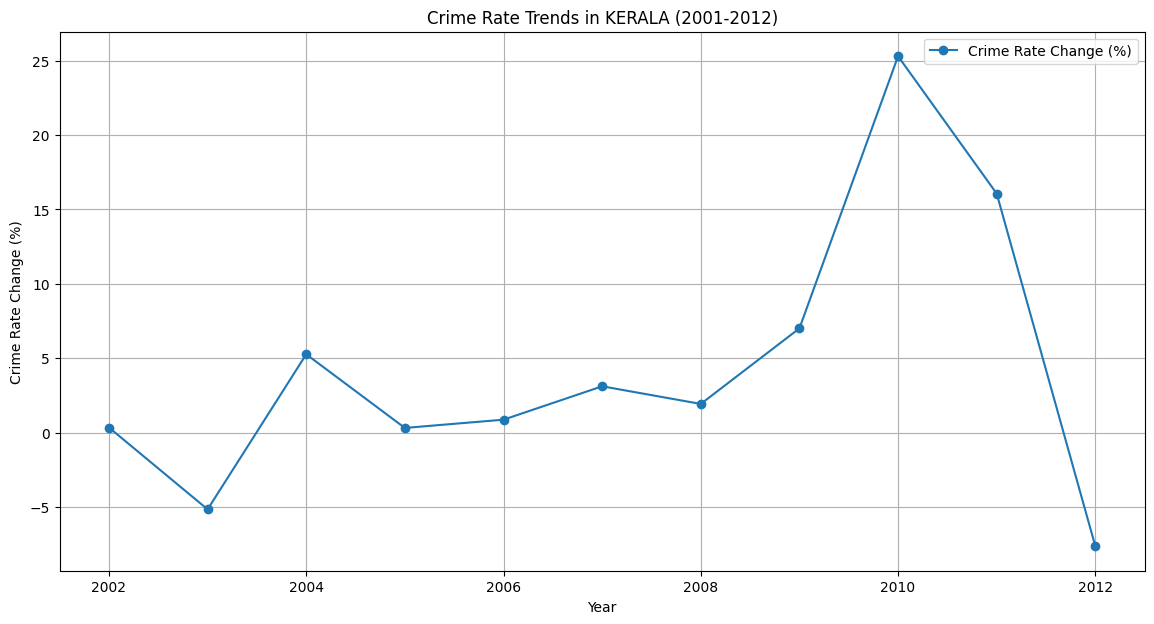

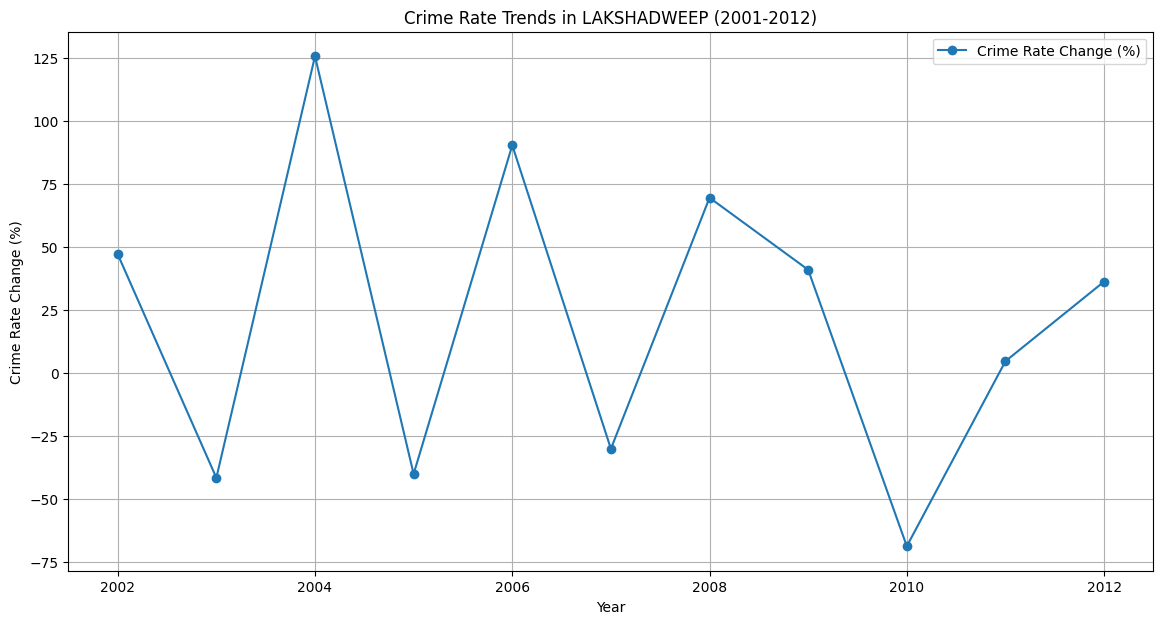

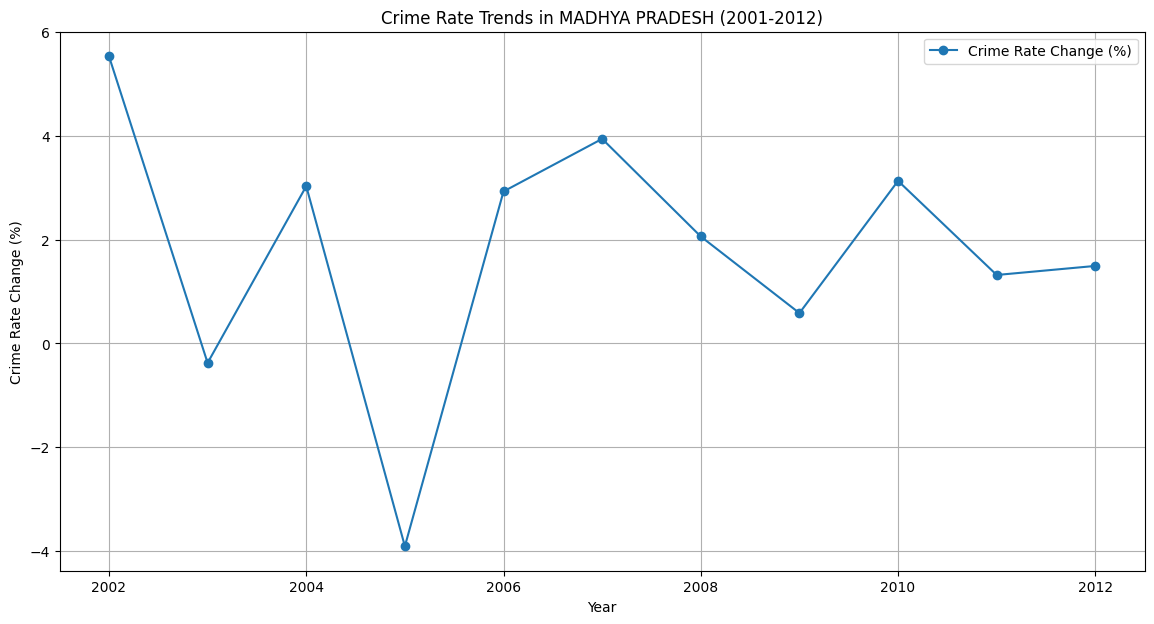

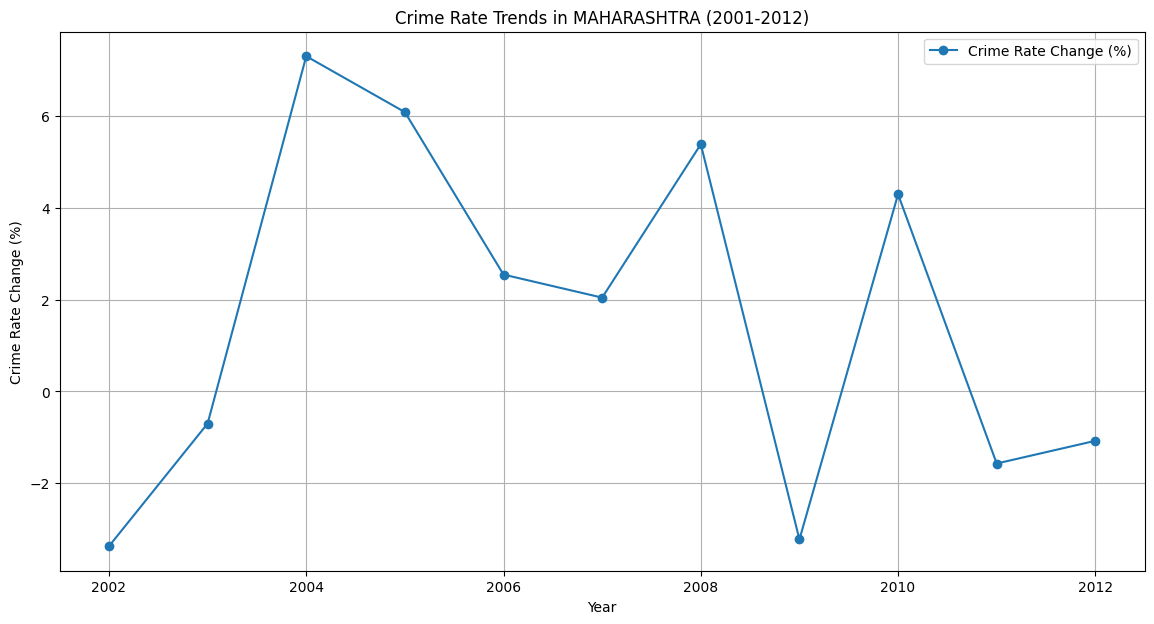

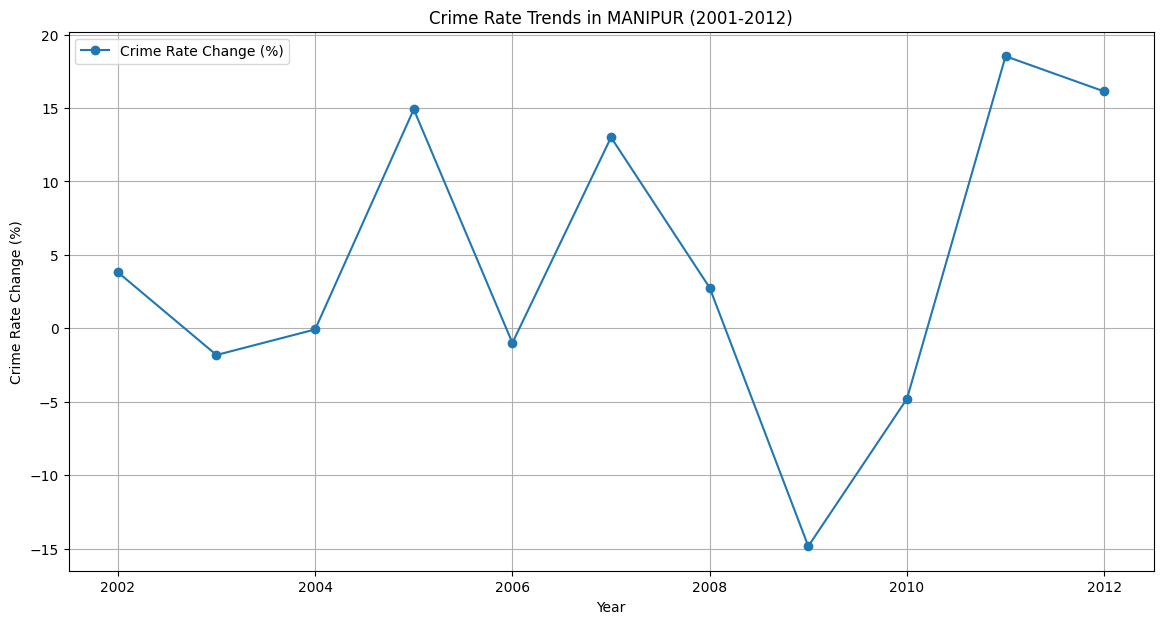

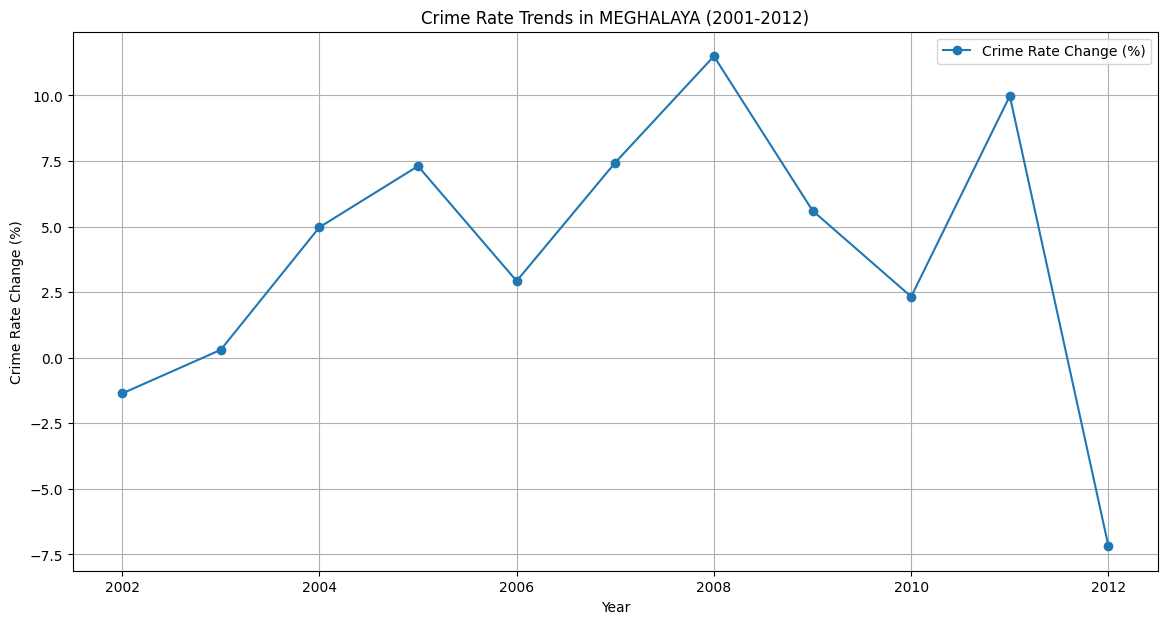

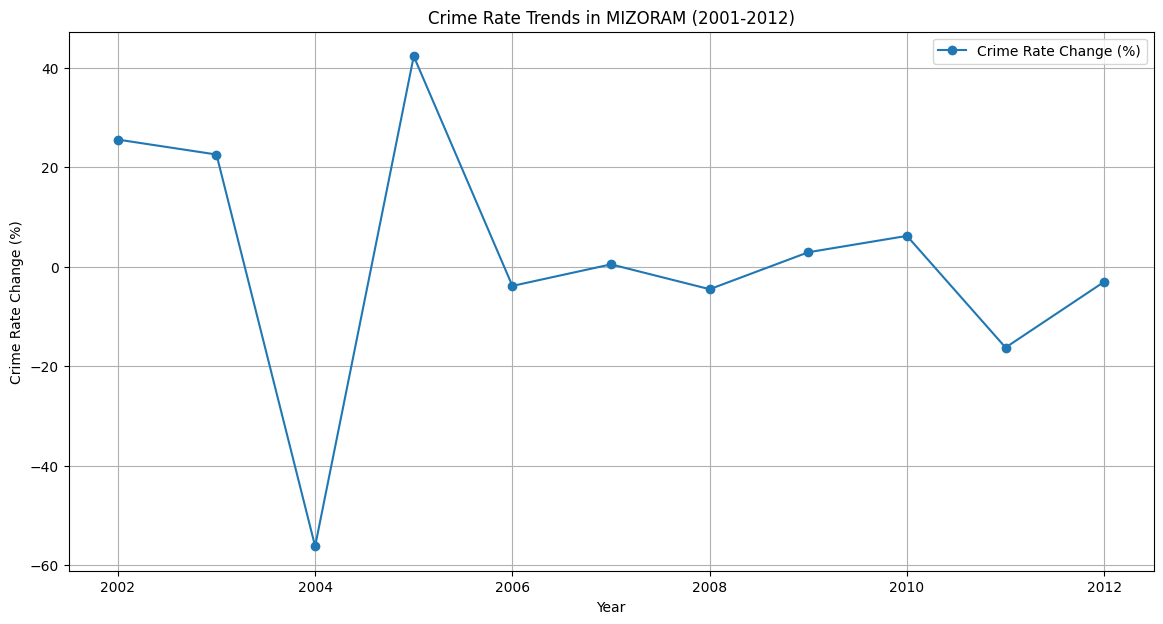

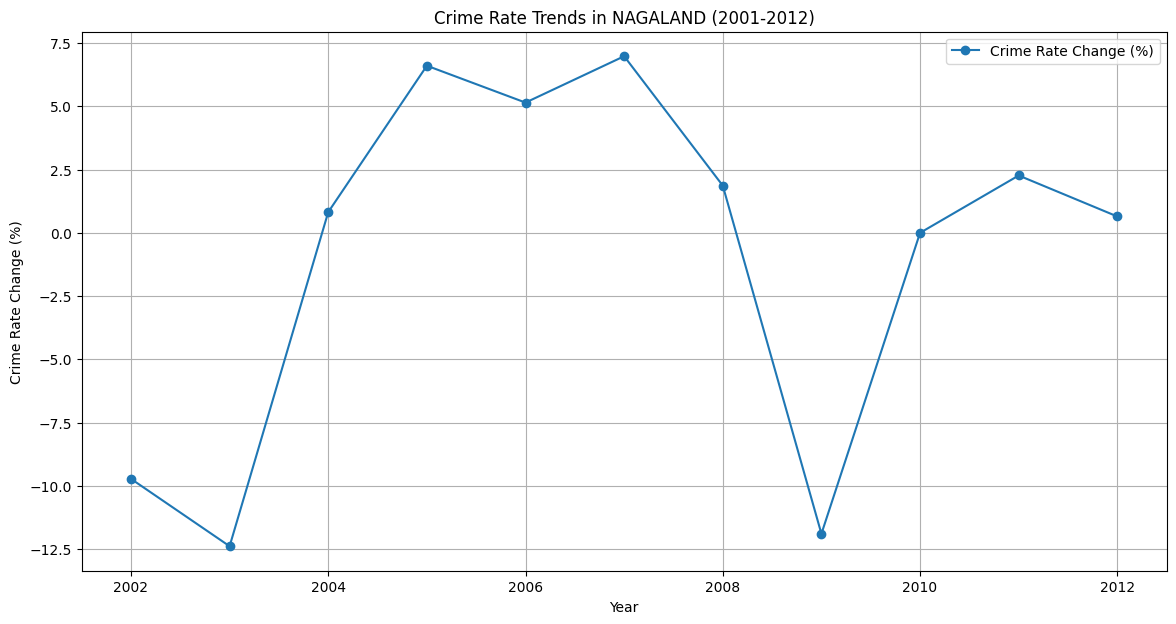

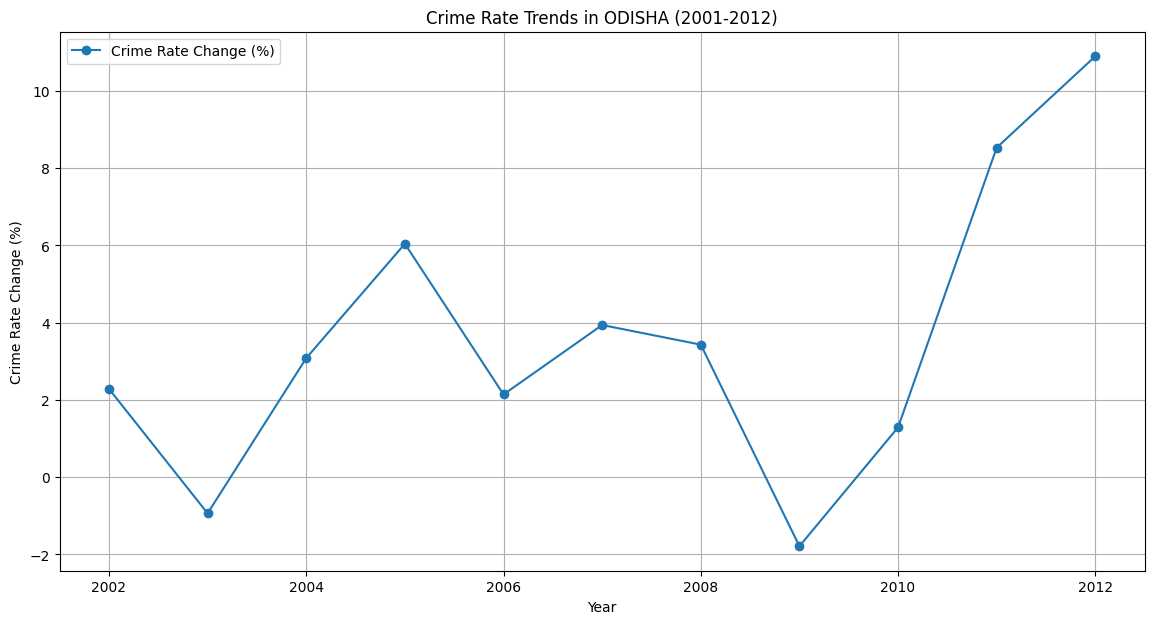

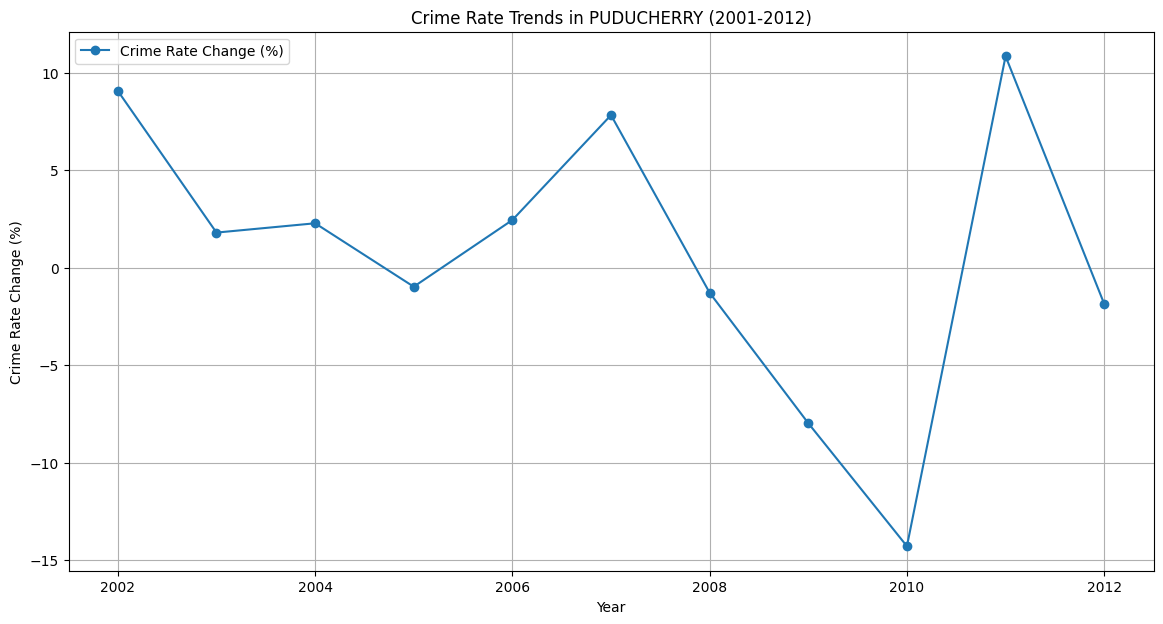

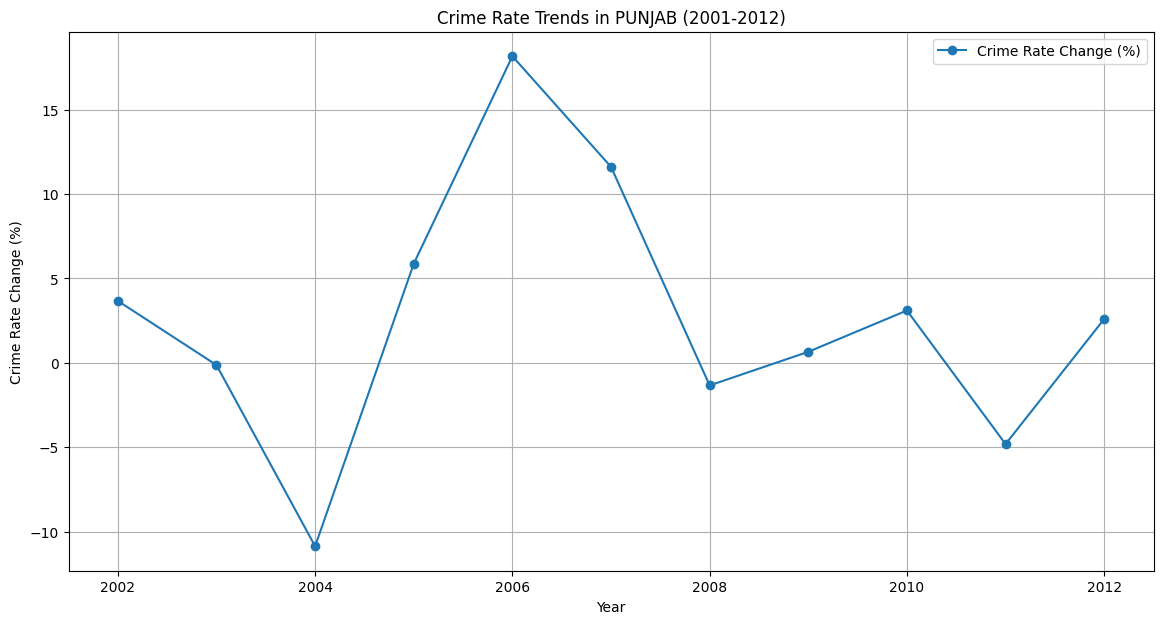

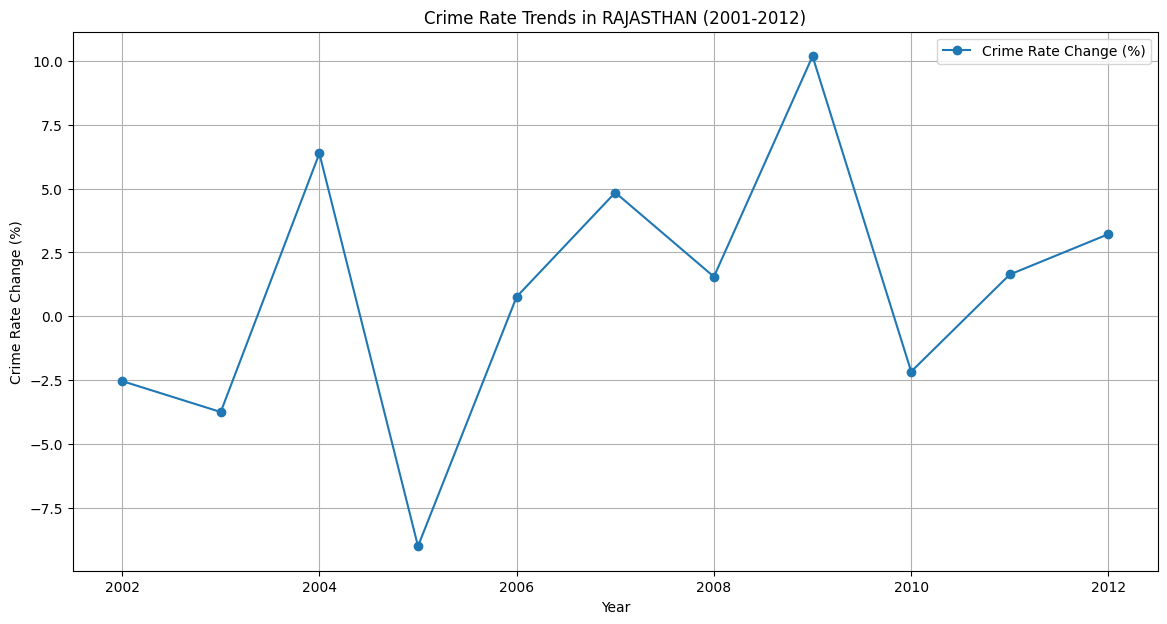

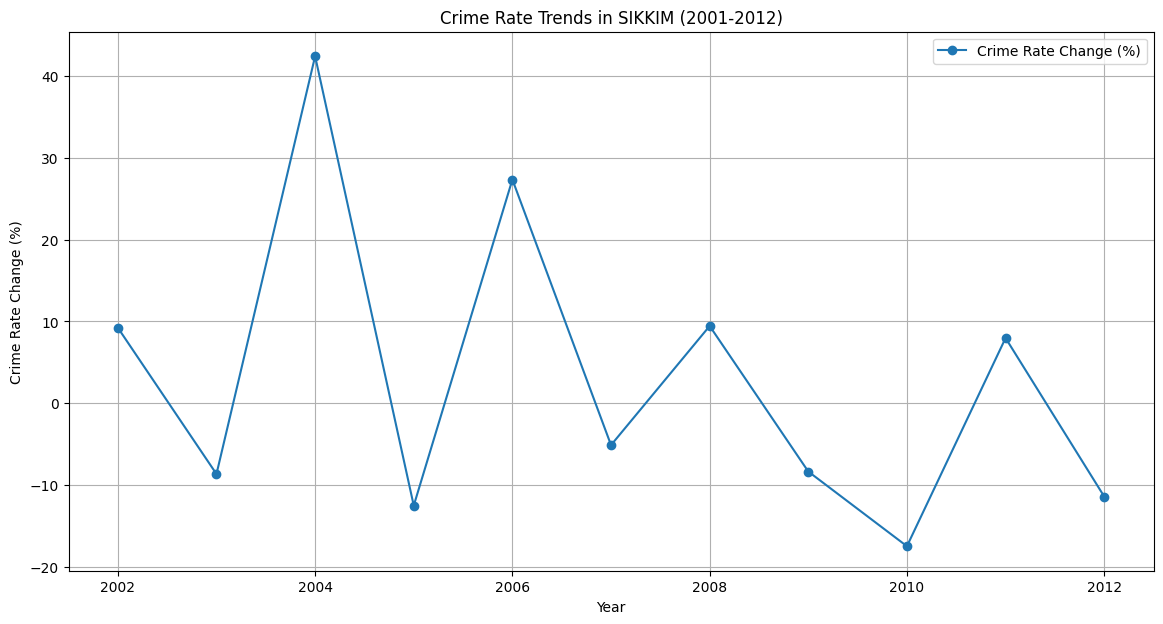

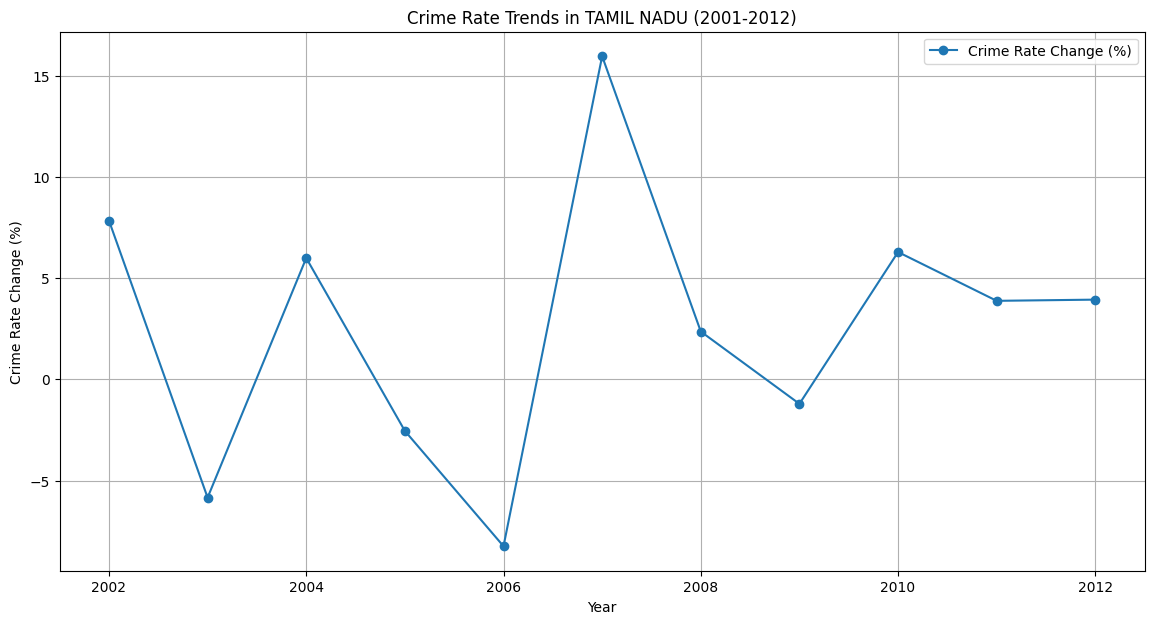

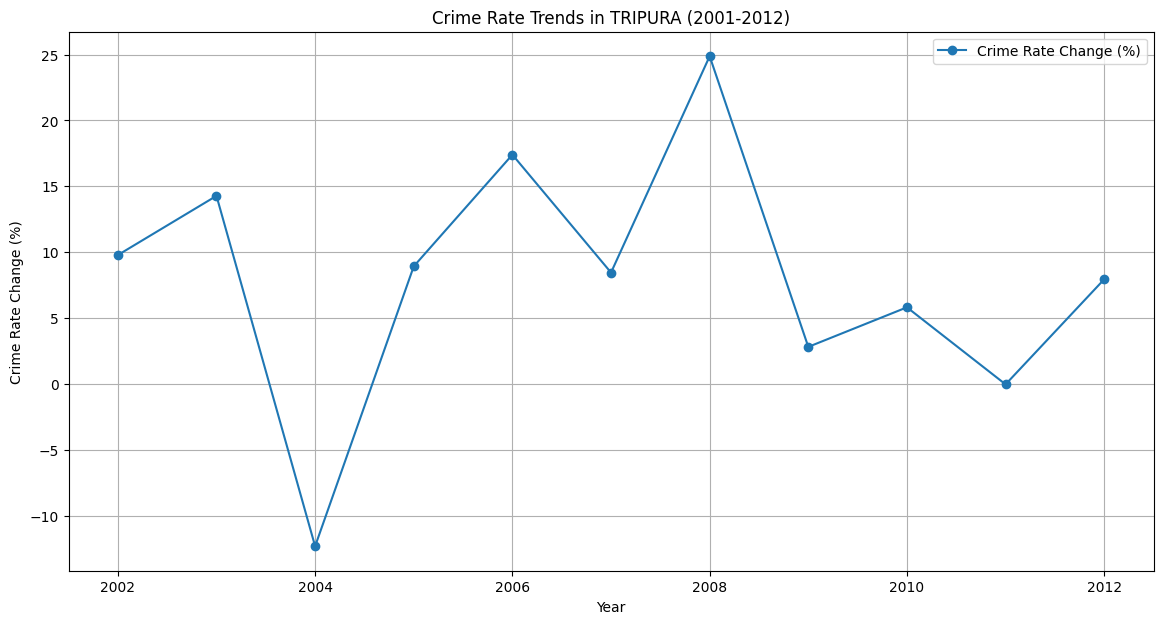

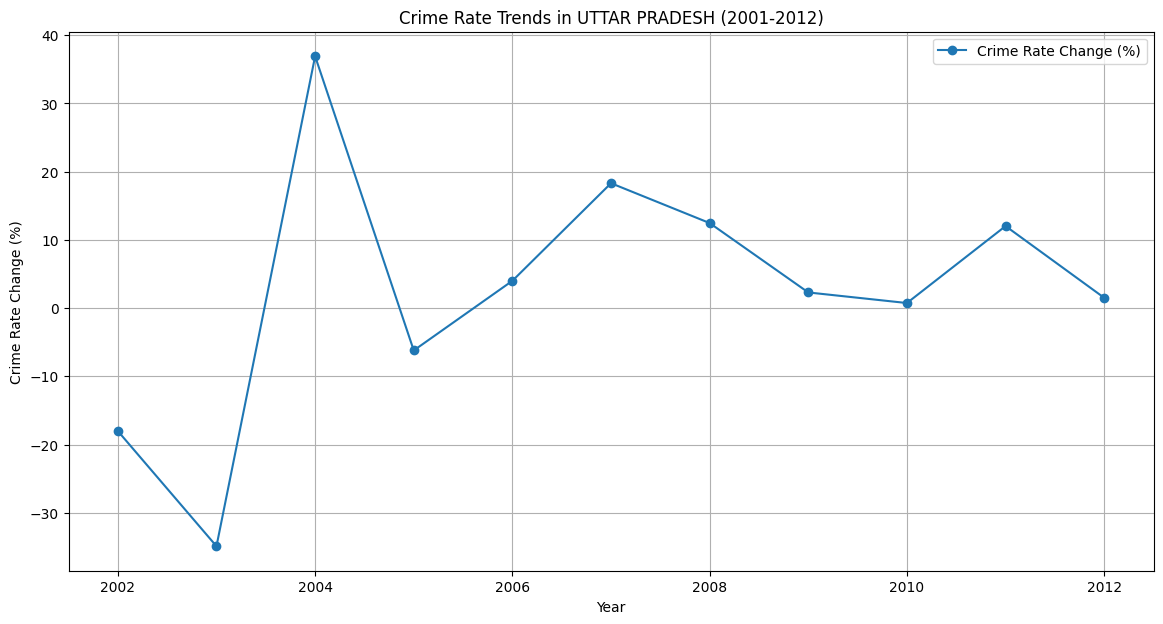

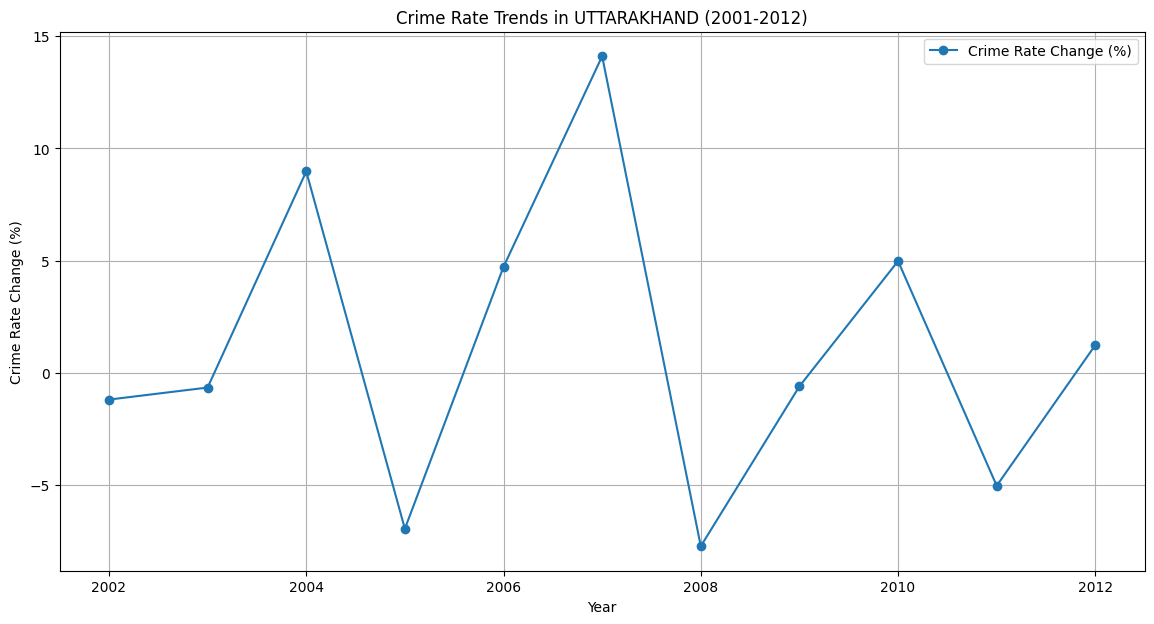

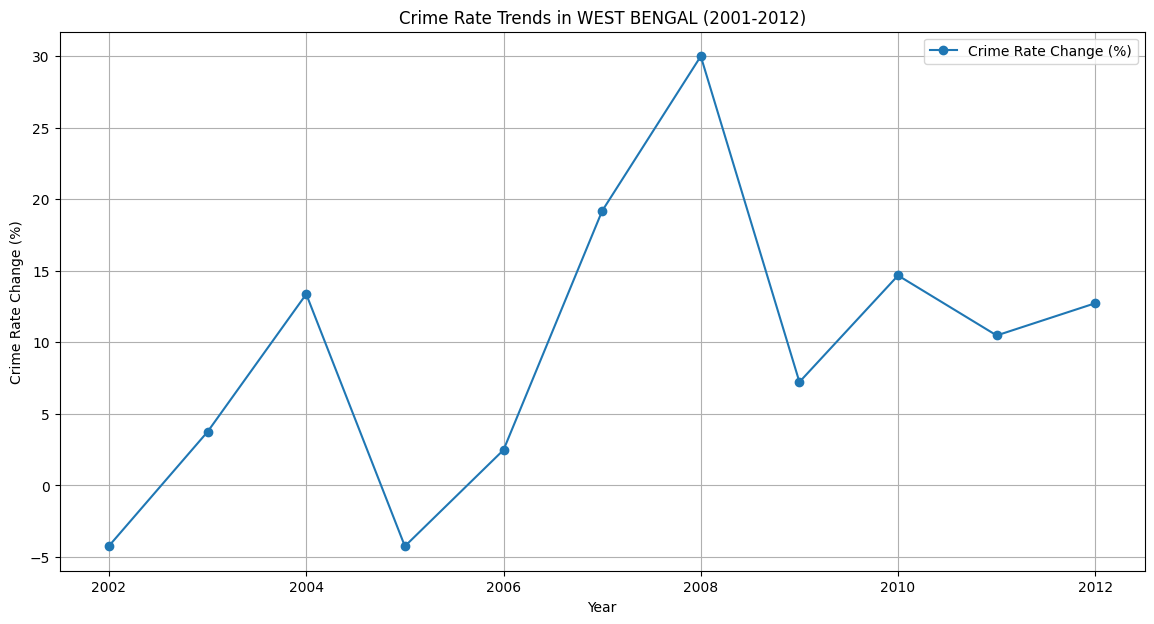

In [12]:
for state in unique_states:
    state_data = crime_trends[crime_trends["STATE/UT"] == state]

    plt.figure(figsize=(14, 7))
    plt.plot(state_data["Year"], state_data["Crime Rate Change (%)"], marker='o', linestyle='-', label="Crime Rate Change (%)")

    plt.xlabel("Year")
    plt.ylabel("Crime Rate Change (%)")
    plt.title(f"Crime Rate Trends in {state} (2001-2012)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

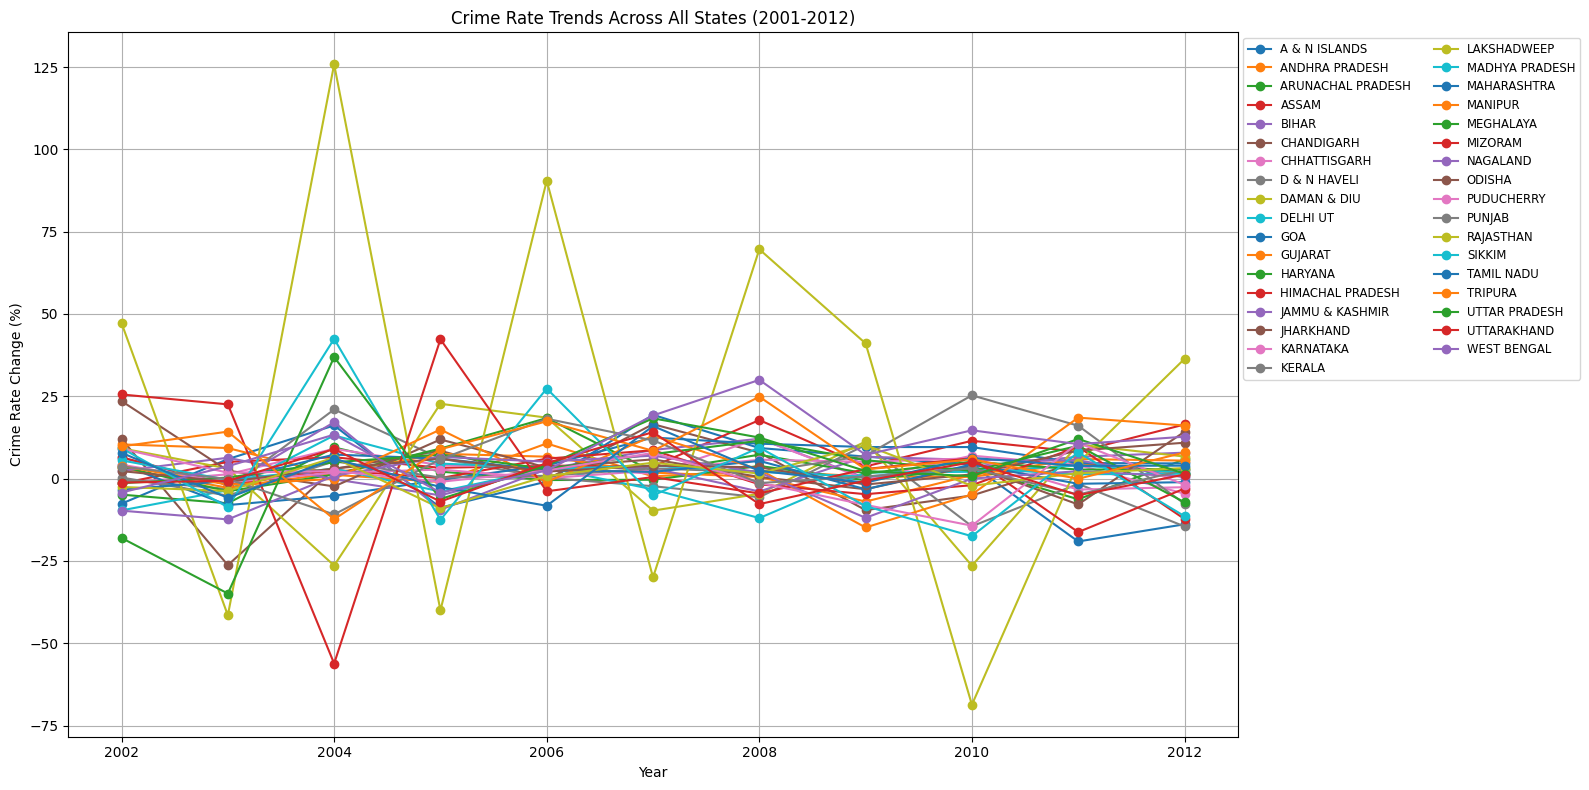

(STATE/UT                 LAKSHADWEEP
 Crime Rate Change (%)      21.378159
 Name: 18, dtype: object,
 STATE/UT                 NAGALAND
 Crime Rate Change (%)   -0.879816
 Name: 24, dtype: object)

In [ ]:

file_paths = {
    "IPC Crimes":r"C:\Users\Sai\Desktop\Q2\01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "Crimes Against SC":r"C:\Users\Sai\Desktop\Q2\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "Crimes Against Children": r"C:\Users\Sai\Desktop\Q2\03_District_wise_crimes_committed_against_children_2001_2012.csv",
    "Crimes Against ST": r"C:\Users\Sai\Desktop\Q2\02_District_wise_crimes_committed_against_ST_2001_2012.csv"}


df_ipc = pd.read_csv(file_paths["IPC Crimes"])
df_sc = pd.read_csv(file_paths["Crimes Against SC"])
df_children = pd.read_csv(file_paths["Crimes Against Children"])
df_st = pd.read_csv(file_paths["Crimes Against ST"])


df_ipc.rename(columns={"YEAR": "Year"}, inplace=True)
df_sc.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_children.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_st.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)

ipc_statewise = df_ipc.groupby(["STATE/UT", "Year"])["TOTAL IPC CRIMES"].sum().reset_index()
sc_statewise = df_sc.groupby(["STATE/UT", "Year"]).sum().reset_index()
children_statewise = df_children.groupby(["STATE/UT", "Year"]).sum().reset_index()
st_statewise = df_st.groupby(["STATE/UT", "Year"]).sum().reset_index()

crime_trends = ipc_statewise.merge(sc_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(children_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(st_statewise, on=["STATE/UT", "Year"], how="left")


crime_trends["Crime Rate Change (%)"] = crime_trends.groupby("STATE/UT")["TOTAL IPC CRIMES"].pct_change() * 100


crime_rate_summary = crime_trends.groupby("STATE/UT")["Crime Rate Change (%)"].mean().reset_index()
highest_increase_state = crime_rate_summary.loc[crime_rate_summary["Crime Rate Change (%)"].idxmax()]
highest_decrease_state = crime_rate_summary.loc[crime_rate_summary["Crime Rate Change (%)"].idxmin()]

unique_states = crime_trends["STATE/UT"].dropna().unique()

plt.figure(figsize=(16, 8))


for state in unique_states:
    state_data = crime_trends[crime_trends["STATE/UT"] == state]
    plt.plot(state_data["Year"], state_data["Crime Rate Change (%)"], marker='o', linestyle='-', label=state)

plt.xlabel("Year")
plt.ylabel("Crime Rate Change (%)")
plt.title("Crime Rate Trends Across All States (2001-2012)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize='small', ncol=2)  
plt.grid(True)
plt.tight_layout()
plt.show()


highest_increase_state, highest_decrease_state


